In [1]:
import psycopg2
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('form5500_data/config.json') as f:
   conf = json.load(f)
   host = conf['host']
   database = conf['database']
   user = conf['user']
   passw = conf['passw']

In [3]:
conn_str = "host={} dbname={} user={} password={}".format(host, database, user, passw)

In [4]:
conn = psycopg2.connect(conn_str)

<h3>Query to join SB, 5500 and H info</h3>

In [5]:
query = "SELECT sb.SB_EIN, sb.SB_PN, sb.SB_CURR_VALUE_AST_01_AMT, sb.SB_TOT_FNDNG_TGT_AMT, sb.SB_PLAN_YEAR_BEGIN_DATE, sb.SB_EFF_INT_RATE_PRCNT, \
form.SPONSOR_DFE_NAME, form.PLAN_NAME, form.SHORT_PLAN_YR_IND, form.COLLECTIVE_BARGAIN_IND, \
h.TOT_ASSETS_BOY_AMT, h.TOT_ASSETS_EOY_AMT, h.TOT_LIABILITIES_BOY_AMT, h.TOT_LIABILITIES_EOY_AMT, h.NET_ASSETS_BOY_AMT, h.NET_ASSETS_EOY_AMT \
FROM sb_full sb \
LEFT JOIN f5500_full form \
ON sb.SB_EIN = form.SPONS_DFE_EIN AND sb.SB_PN = form.SPONS_DFE_PN \
LEFT JOIN h_full h \
ON sb.SB_EIN = h.SCH_H_EIN AND sb.SB_PN = h.SCH_H_PN \
WHERE sb.SB_PLAN_YEAR_BEGIN_DATE BETWEEN '2017-01-01' AND '2017-12-31';"

In [6]:
test_df = pd.read_sql(query, con=conn)

In [16]:
test_df.shape, \
len(test_df[pd.isnull(test_df['sponsor_dfe_name'])])

((40410, 16), 15039)

In [7]:
len(test_df[test_df['sponsor_dfe_name'].notnull()])

25371

In [9]:
sponsor_names = test_df['sponsor_dfe_name'].notnull()
sponsor_names.to_csv('')

<h3>Check for null plan sponsor names - appears to be ~15k out of ~40k</h3>

In [14]:
test_df[pd.isnull(test_df['sponsor_dfe_name'])]

,sb_ein,sb_pn,sb_curr_value_ast_01_amt,sb_tot_fndng_tgt_amt,sb_plan_year_begin_date,sb_eff_int_rate_prcnt,sponsor_dfe_name,plan_name,short_plan_yr_ind,collective_bargain_ind,tot_assets_boy_amt,tot_assets_eoy_amt,tot_liabilities_boy_amt,tot_liabilities_eoy_amt,net_assets_boy_amt,net_assets_eoy_amt
1,261260757,2,1711479.0,1035623.0,2017-01-01,5.75,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
2,273019797,2,1051919.0,703802.0,2017-01-01,5.89,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
3,341136742,2,1093908.0,868859.0,2017-01-01,5.72,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
4,351779856,2,537871.0,458314.0,2017-01-01,4.49,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
5,452679049,1,1605240.0,1306459.0,2017-01-01,5.75,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
7,581705799,2,3792412.0,4377447.0,2017-01-01,5.78,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
8,61090877,3,3285039.0,2523598.0,2017-01-01,5.69,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
9,201271454,2,945099.0,820715.0,2017-01-01,5.92,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
10,203475838,2,1667983.0,1184790.0,2017-01-01,4.41,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
11,204696592,1,259628.0,252511.0,2017-01-01,5.68,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN


<h3>Query to look at 5500 info only</h3>

In [13]:
query_f = "SELECT f.TYPE_PLAN_ENTITY_CD, f.SPONSOR_DFE_NAME, f.FORM_PLAN_YEAR_BEGIN_DATE, f.SPONS_DFE_DBA_NAME, f.SCH_SB_ATTACHED_IND, f.BUSINESS_CODE \
FROM f5500_full f;"

In [14]:
df_f = pd.read_sql(query_f, con=conn)

In [12]:
len(df_f[df_f['sch_sb_attached_ind'] =='1'])

64014

In [18]:
len(df_f[(df_f['business_code'].notnull()) & (df_f['sch_sb_attached_ind'] == '1')])

64004

In [15]:
df_f.head()

,type_plan_entity_cd,sponsor_dfe_name,form_plan_year_begin_date,spons_dfe_dba_name,sch_sb_attached_ind,business_code
0,2,"SOUTHERN MICHIGAN BANCORP, INC.",2017-01-01,None,0,551111
1,2,"PARAMEDICS PLUS, LLC",2017-01-01,None,0,621900
2,2,JANUS ESOP HOLDINGS INC.,2017-11-01,None,0,541990
3,2,"INDUSTRIAL MAINTENANCE, WELDING & MACHINING CO...",2017-01-01,None,0,333200
4,2,"TERRI SMITH MEINHOLD, D.D.S.",2017-01-01,None,None,621210


In [45]:
pd.pivot_table(df_f,index='form_plan_year_begin_date',values='type_plan_entity_cd',aggfunc=lambda x: len(x.unique()))

,type_plan_entity_cd
form_plan_year_begin_date,
1012-07-07,1
1013-01-07,1
1973-07-01,1
1974-01-01,1
1974-07-01,1
1975-01-01,1
1975-07-01,1
1976-01-01,1
1976-07-01,1


In [37]:
df_f[df_f['sch_sb_attached_ind'] == '1'].groupby('form_plan_year_begin_date')['type_plan_entity_cd'].count()

form_plan_year_begin_date
1997-01-01       1
1997-10-01       1
1998-01-01       1
1998-10-01       1
1999-01-01       1
1999-06-30       1
1999-10-01       1
2000-01-01       2
2000-06-30       1
2000-10-01       1
2001-01-01       2
2001-06-30       1
2001-07-01       1
2001-10-01       1
2002-01-01       2
2002-06-30       1
2002-07-01       1
2002-10-01       1
2002-11-01       1
2003-01-01       4
2003-06-30       1
2003-07-01       1
2003-10-01       1
2003-11-01       1
2004-01-01       6
2004-06-30       1
2004-07-01       1
2004-10-01       2
2004-11-01       1
2005-01-01       9
              ... 
2017-01-01    7485
2017-01-02       3
2017-01-03       1
2017-02-01      27
2017-02-15       1
2017-02-17       1
2017-02-25       1
2017-03-01      13
2017-03-31       1
2017-04-01      18
2017-05-01       4
2017-06-01       6
2017-06-03       1
2017-06-15       1
2017-06-29       1
2017-07-01      13
2017-07-29       1
2017-08-08       1
2017-09-01       3
2017-10-01       8
2017-

In [35]:
df_f.head()

,type_plan_entity_cd,sponsor_dfe_name,form_plan_year_begin_date,spons_dfe_dba_name,sch_sb_attached_ind
0,2,RAULAND-BORG CORPORATION,2017-01-01,None,0
1,2,"OKLAHOMA SURGICAL HOSPITAL, LLC",2017-01-01,None,0
2,2,CLAMPITT PAPER COMPANY OF DALLAS,2017-01-01,None,None
3,2,"THOMAS G. D'LUGE, P.C.",2017-01-01,None,None
4,2,"THE ARC OF ULSTER-GREENE NYSARC, INC.",2017-01-01,None,0


In [44]:
test_df['funded_status']=test_df['sb_curr_value_ast_01_amt']/test_df['sb_tot_fndng_tgt_amt']

In [59]:
fs_buckets = np.array([0,.7,.8,.9,1.,2.,3.,10.])

In [60]:
test_df['fs_bucket']=pd.cut(test_df['funded_status'], fs_buckets)

TypeError: unorderable types: Interval() < float()

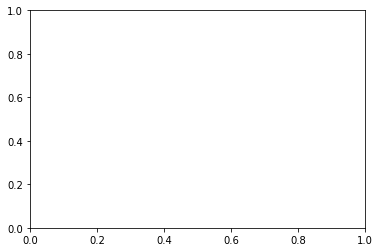

In [56]:
plt.hist(test_df['fs_bucket'])